In [1]:
import altair as alt
import numpy as np
import pandas as pd

from noise_results_plot import load_data

In [29]:
FONT_SIZE = 18
CONFIGS = {
#     "style": {
#         "bar": {
#             "size": 20
#         },
#     },
    "header": {
        "titleFontSize": FONT_SIZE,
        "labelFontSize": FONT_SIZE,
    },
    "axis": {
        "titleFontSize": FONT_SIZE,
        "labelFontSize": FONT_SIZE,
    },
    "legend": {
        "titleFontSize": FONT_SIZE,
        "labelFontSize": FONT_SIZE,
    },
    "encoding": {
        "x": {
            "scale": {
                "paddingOuter": 0.5,
                "paddingInner": 0.5,
            }
        }
    }
}

my_theme = lambda *args, **kwargs: {
    "config": CONFIGS,
}

alt.themes.register("my_theme", my_theme)
alt.themes.enable("my_theme")

ThemeRegistry.enable('my_theme')

In [3]:
wers = load_data()

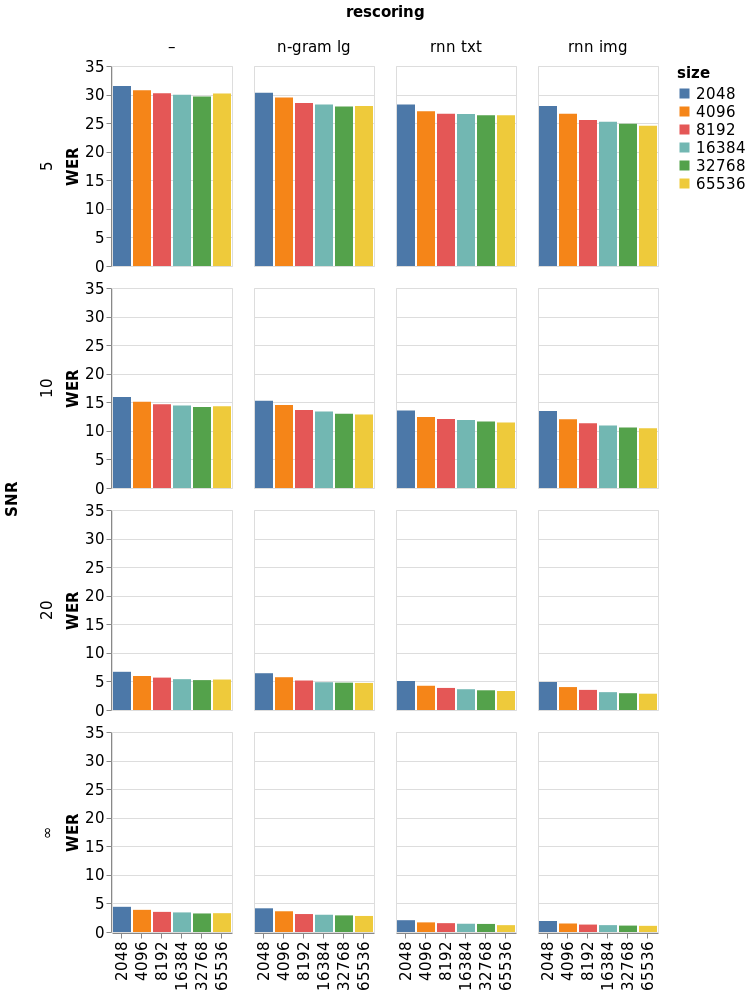

In [21]:
bars = alt.Chart().mark_bar().encode(
    x=alt.X("size:O", title=""),
    y="WER",
    color="size:N",
)
chart = alt.layer(bars, data=wers).facet(
    row=alt.Column('SNR', sort='5 10 20 ∞'.split()),
    column=alt.Column('rescoring', sort='–,n-gram lg,rnn txt,rnn img'.split(',')),
)
chart.save("noise-plot-1.svg")
chart

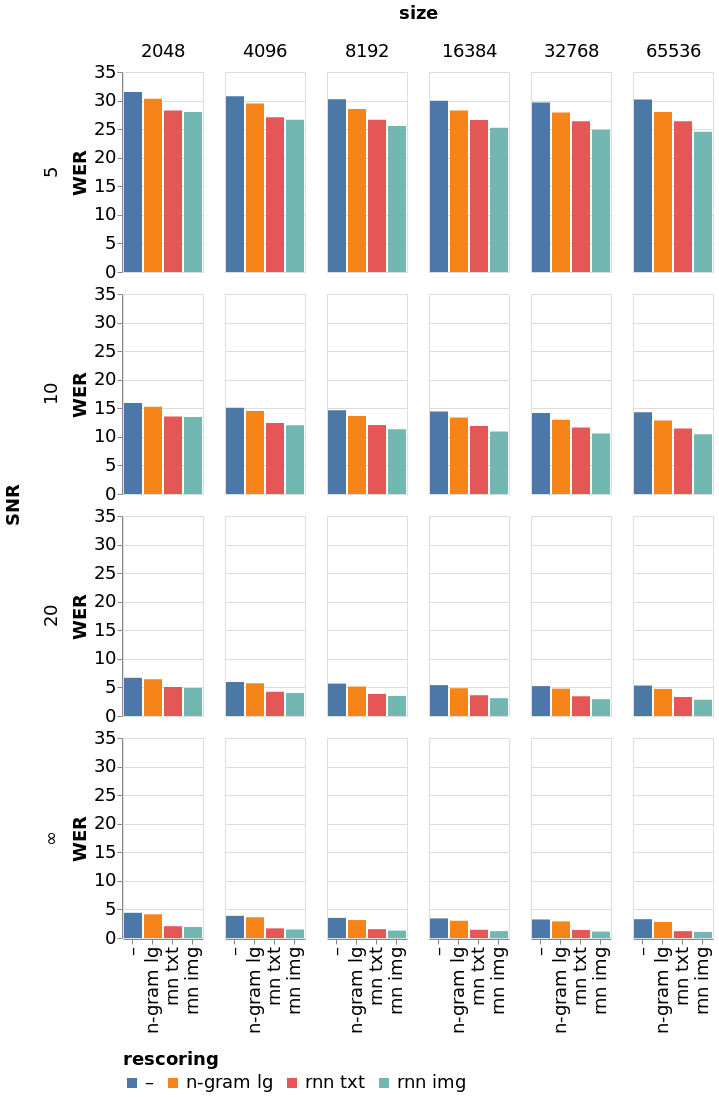

In [30]:
rescoring_order = '–,n-gram lg,rnn txt,rnn img'.split(',')
bars = alt.Chart().mark_bar().encode(
    x=alt.X("rescoring:O", sort=rescoring_order, title=""),
    y="WER",
    color=alt.Color("rescoring:N", sort=rescoring_order, legend=alt.Legend(direction="horizontal", orient="bottom")),
)
chart = alt.layer(bars, data=wers).facet(
    column="size",
    row=alt.Column('SNR', sort='5 10 20 ∞'.split()),
)
chart.save("noise-plot-2.svg")
chart